# Project: Facial Emotion Recognition (happy or sad) using CNN

## Objective
In this project, your task is to build an image classification pipeline that can accurately identify human emotions (happy or sad) from facial images. You will focus on preparing and pre-processing image data, designing a Convolutional Neural Network (CNN), training the model, and testing it on your very own images. (maybe your own face!)

## What is Convolutional Neural Networks (CNNs)?
Humans recognise objects in images effortlessly, but computers need guidance. Convolutional Neural Networks (CNNs) do this by applying filters, small grids that scan an image for patterns like edges, corners, or shapes. Early layers detect simple features, while deeper layers combine them to identify complex objects like windows, doors, or entire houses. Using processes like pooling, CNNs summarise these features to “see” and understand images, powering applications from visual search and facial recognition to medical imaging and object detection.

## Skills You'll Develop
- Image pre-processing (resizing, scaling, and data cleaning)
- Convolutional Neural Network (CNN) design and training
- Model evaluation and metrics (accuracy, precision, recall)
- Testing models on new images

## Step 1: Install Dependencies and Setup

1) We need a few Python libraries

In [24]:
!pip install tensorflow opencv-python matplotlib

2) Then, we import necessary modules:

In [25]:
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


Explanation:
- tensorflow – main deep learning library
- cv2 – for working with images
- matplotlib – to visualise images and plots
- Sequential, Conv2D, etc. – used to build a CNN

## Step 2: Remove Corrupted images

In [26]:
data_dir = 'data'  # Folder with subfolders 'Happy' and 'Sad'
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Removing invalid image:', image_path)
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image:', image_path)


Issue with image: data\happy\05-12-21-happy-people.jpg
Issue with image: data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image: data\happy\1-2.jpg
Issue with image: data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image: data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image: data\happy\154006829.jpg
Issue with image: data\happy\170404-happy-workers-feature.jpg
Issue with image: data\happy\1902539.jpg
Issue with image: data\happy\1902540.jpg
Issue with image: data\happy\1902587.jpg
Issue with image: data\happy\1920px-face-smile.svg_.png.jpg
Issue with image: data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image: data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image: data\happy\60632274._UY200_.jpg
Issue with image: data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image: data\happy\7-principles-of-successful-and-happy-people.png
Issue with image: data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIF

Explanation:
- Some images might be corrupted or in the wrong format.
- Removing them ensures the model doesn’t crash during training.

## Step 3: Load Dataset

In [27]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


Explanation:
- This loads all images from your data folder and automatically labels them based on subfolder names (Happy, Sad).

1) Then, we need to visualise some sample images

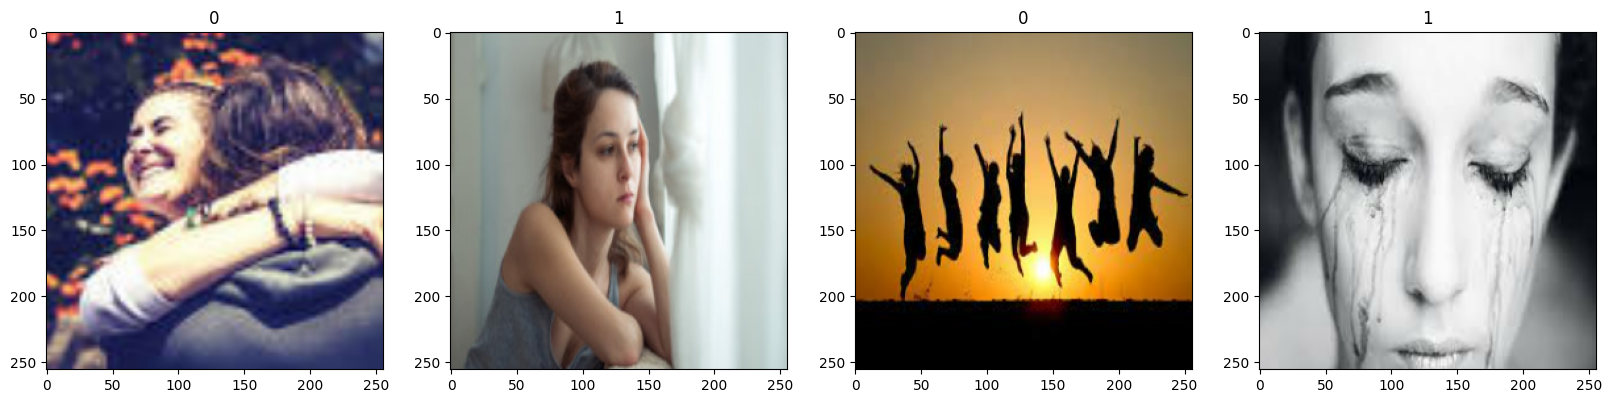

In [28]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

## Step 4: Scale the data

In [29]:
data = data.map(lambda x, y: (x/255, y))

Explanation:
- Pixel values range from 0 to 255.
- Dividing by 255 scales them to 0–1, which helps the model train faster and better.

## Step 5: Split Dataset

In [30]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Explanation:
- Training set (70%): used to train the model
- Validation set (20%): used to tune model parameters
- Test set (10%): used to evaluate final model performance

## Step 6: Build your very own CNN Model!

In [31]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [32]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Explanation:
- Conv2D: learns features from images
- MaxPooling2D: reduces image size, keeping important features
- Flatten: converts 2D features to 1D vector
- Dense: fully connected layers for final classification
- Sigmoid: outputs probability for binary classification (Happy/Sad)

Fine-tuning tips:
- Increase Conv2D filters (32, 64) for more complex images
- Add Dropout(0.3) after Dense layers to prevent overfitting
- Try more epochs (10–20) for better accuracy (later on)

## Step 7: Train the model

In [33]:
hist = model.fit(train, validation_data=val, epochs=10, verbose=1) 

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.5509 - loss: 0.7952 - val_accuracy: 0.6094 - val_loss: 0.6705
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.6413 - loss: 0.6607 - val_accuracy: 0.7656 - val_loss: 0.5559
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.7222 - loss: 0.5259 - val_accuracy: 0.8438 - val_loss: 0.3980
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.7019 - loss: 0.5446 - val_accuracy: 0.8594 - val_loss: 0.4603
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.8403 - loss: 0.4840 - val_accuracy: 0.9375 - val_loss: 0.3389
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.8610 - loss: 0.3935 - val_accuracy: 0.8750 - val_loss: 0.2639
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.8754 - loss: 0.3134 - val_accuracy: 0.9219 - val_loss: 0.2194
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.9125 - loss: 0.2268 - val_accuracy: 0.8906 - val_loss:

Explanation:
- The model learns patterns in your training images.
- Validation data checks performance on unseen images during training.

## Step 8: Plot the performance

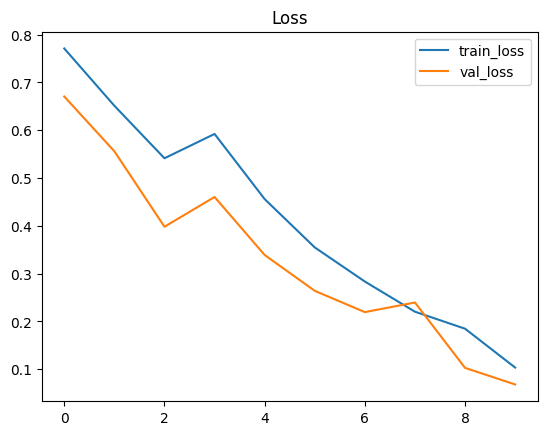

In [34]:
# Loss
plt.figure()
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

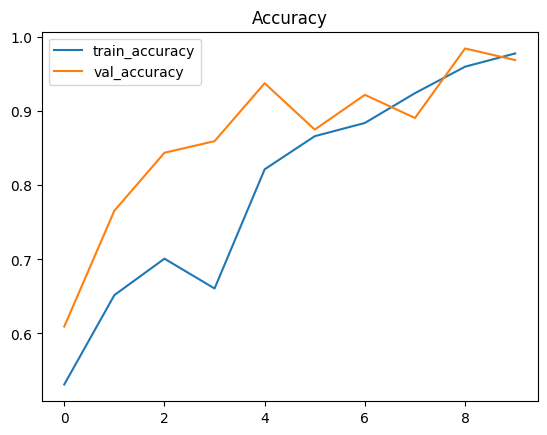

In [35]:
# Accuracy
plt.figure()
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

Explanation:
- Loss should decrease and accuracy should increase over epochs.
- Use these plots to check if your model is learning properly.

Note:
- Training metrics tell you if the model is learning from the data.
- Validation metrics tell you if the model can perform well on new, unseen data.
- If your validation loss is much higher than training loss → your model might be overfitting (memorising training data instead of learning patterns).

## Step 9: Evaluate on Test Set

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f"Test Precision: {pre.result().numpy()}")
print(f"Test Recall: {re.result().numpy()}")
print(f"Test Accuracy: {acc.result().numpy()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Test Precision: 1.0
Test Recall: 1.0
Test Accuracy: 1.0


Explanation:
- Evaluates your model on unseen data to see real performance.

# Step 10: Test

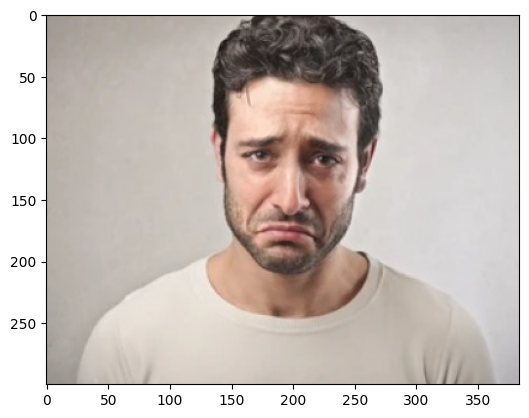

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[[0.92962146]]
Predicted class: Sad


In [37]:
test_image_path = 'C:/Users/weiji/OneDrive/Documents/Image classfification project/man.jpg'  # replace with your own image
img = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

if yhat > 0.5: 
    print("Predicted class: Sad")
else:
    print("Predicted class: Happy")

## Step 11: Save your own model

In [41]:
model.save('models/imageclassifier.h5')

Explanation:
- Saving allows you to use your model later without retraining.

## Summary

YOUR SUMMARY HERE

# Feedback
If you have any feedback about this project at all, feel free to tell us using this form: 